In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from findlay2025a import core

In [2]:
nb = core.get_project()
measures = pd.read_parquet(nb.get_project_file("condition_measures.pqt"))

In [3]:
condition_palette = sns.color_palette("Paired")
for i in np.arange(len(condition_palette))[1::2]:  # Desaturate some colors a bit
    condition_palette[i] = tuple(
        (np.array(condition_palette[i]) + np.array(condition_palette[i - 1])) / 2
    )

condition_palette = {
    k: v
    for k, v in zip(
        [
            "Early BSL NREM",
            "Late BSL NREM",
            "Early EXT Wake",
            "Late EXT Wake",
            "Early REC NREM",
            "Late REC NREM",
        ],
        condition_palette,
    )
}  # Assign colors to conditions


experiment_palette = sns.color_palette("Dark2_r", 8)
experiment_palette = dict(zip(["Novelty", "Locomotion", "Dual"], experiment_palette))

In [4]:
def do_plot(
    measures: pd.DataFrame, yvar: str, ylabel: str
) -> tuple[plt.Figure, plt.Axes]:
    fig, axes = plt.subplots(1, 3, figsize=(7, 4), sharex=True, sharey=True)
    for ax, exp in zip(axes, experiment_palette.keys()):
        sns.violinplot(
            measures[measures["experiment"] == exp],
            x="condition",
            order=condition_palette.keys(),
            y=yvar,
            hue="condition",
            hue_order=condition_palette.keys(),
            palette=condition_palette,
            inner=None,
            density_norm="width",
            legend=False,
            ax=ax,
        )
        sns.stripplot(
            measures[measures["experiment"] == exp],
            x="condition",
            order=condition_palette.keys(),
            y=yvar,
            color=experiment_palette[exp],
            edgecolor="k",
            linewidth=0.5,
            s=3,
            dodge=False,
            ax=ax,
            legend=False,
        )
        ax.set_xticks(ax.get_xticks())  # Suppreses warning
        ax.set_xticklabels(["E", "L"] * 3, weight="bold")
        ax.set_xlabel("")
        ax.set_ylabel(ylabel, weight="bold")
        ax.set_title(exp, weight="bold", color=experiment_palette[exp])

    fig.tight_layout()
    return fig, axes

### Extended Data Figure 3A

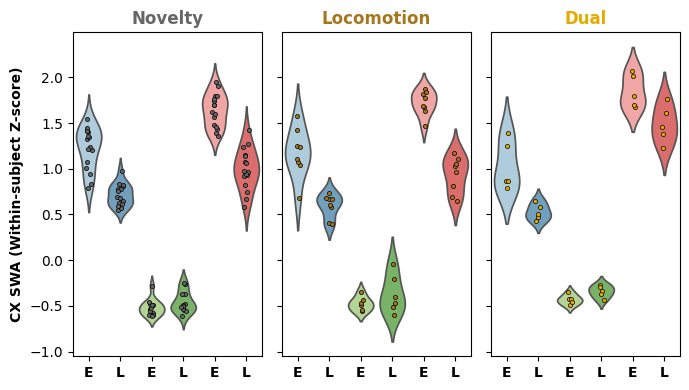

In [5]:
fig, axes = do_plot(measures, "Cortical SWA", "CX SWA (Within-subject Z-score)")
# fig.savefig(nb.get_project_file("figures/exp_condition_measures_cx_swa.png"), bbox_inches="tight", dpi=600)

### Extended Data Figure 3B

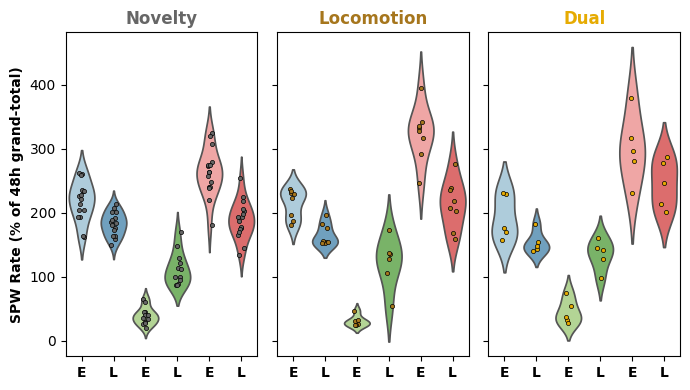

In [ ]:
measures["SPW Rate (%)"] = measures["SPW Rate"] * 100
fig, axes = do_plot(measures, "SPW Rate (%)", "SPW Rate (% of 48h grand-total)")
# fig.savefig(
#    nb.get_project_file("figures/exp_condition_measures_spw_rate.png"),
#    bbox_inches="tight",
#    dpi=600,
# )

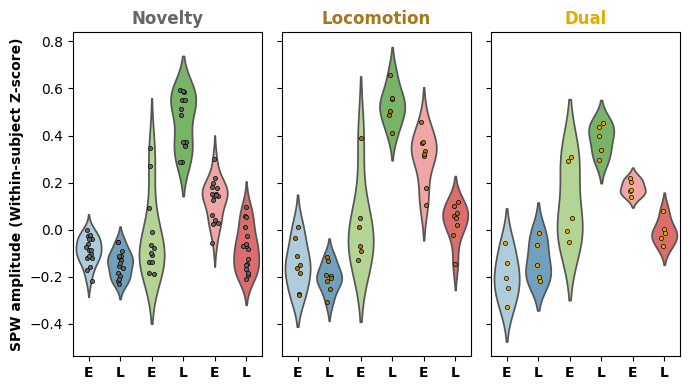

In [6]:
fig, axes = do_plot(measures, "SPW Amplitude", "SPW amplitude (Within-subject Z-score)")
# fig.savefig(nb.get_project_file("figures/exp_condition_measures_spw_amp.png"), bbox_inches="tight", dpi=600)

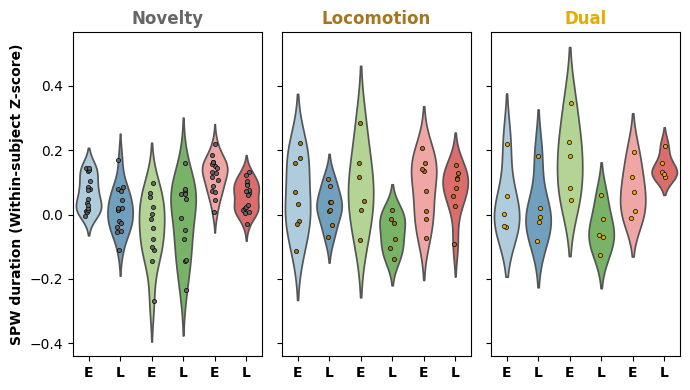

In [ ]:
fig, ax = do_plot(measures, "SPW Duration", "SPW duration (Within-subject Z-score)")
# fig.savefig(
#     nb.get_project_file("figures/exp_condition_measures_spw_duration.png"),
#     bbox_inches="tight",
#     dpi=600,
# )

### Extended Data Figure 3C

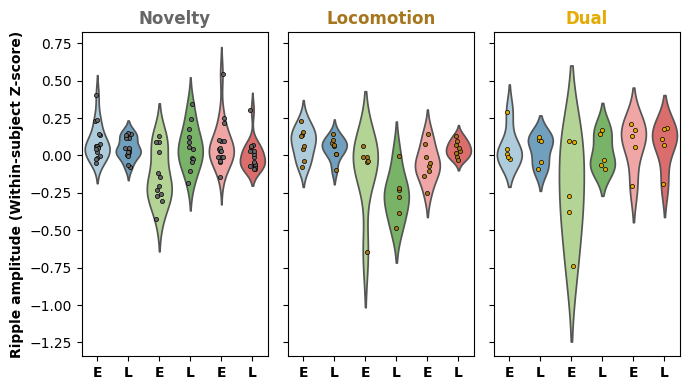

In [9]:
fig, axes = do_plot(
    measures, "Ripple Amplitude", "Ripple amplitude (Within-subject Z-score)"
)
# fig.savefig(
#     nb.get_project_file("figures/exp_condition_measures_ripple_amp.png"),
#     bbox_inches="tight",
#     dpi=600,
# )

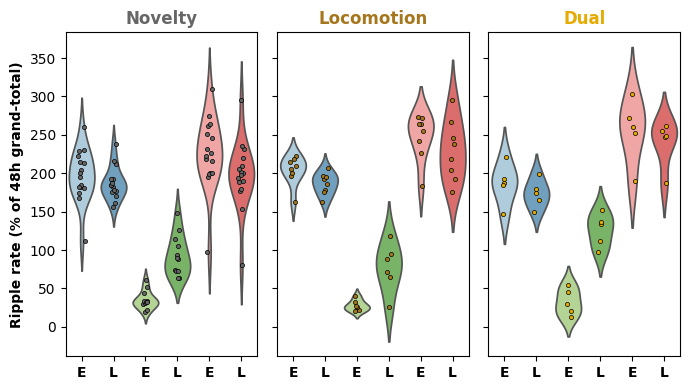

In [10]:
measures["Ripple Rate (%)"] = measures["Ripple Rate"] * 100
fig, ax = do_plot(measures, "Ripple Rate (%)", "Ripple rate (% of 48h grand-total)")
# fig.savefig(
#     nb.get_project_file("figures/exp_condition_measures_ripple_rate.png"),
#     bbox_inches="tight",
#     dpi=600,
# )

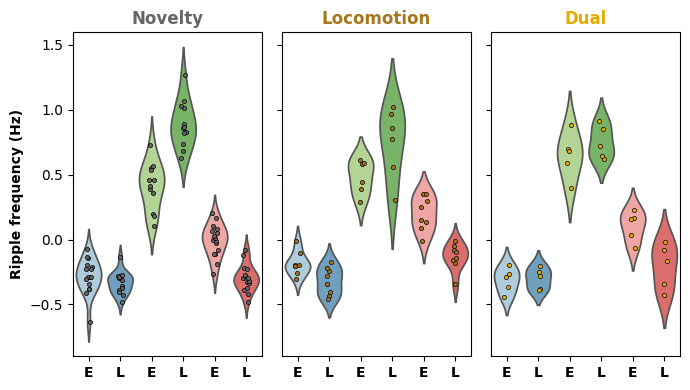

In [11]:
fig, axes = do_plot(measures, "Ripple Frequency", "Ripple frequency (Hz)")
# fig.savefig(
#     nb.get_project_file("figures/exp_condition_measures_ripple_freq.png"),
#     bbox_inches="tight",
#     dpi=600,
# )

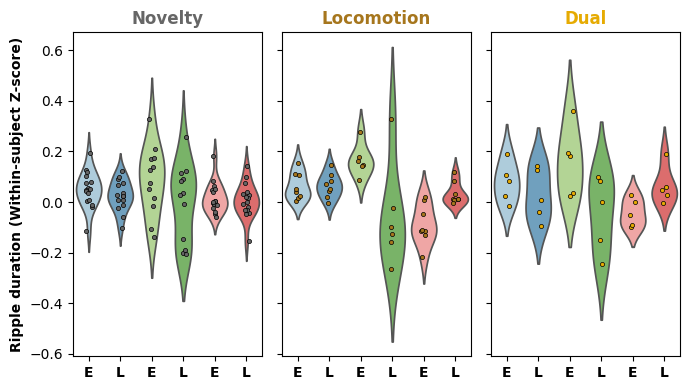

In [12]:
fig, axes = do_plot(
    measures, "Ripple Duration", "Ripple duration (Within-subject Z-score)"
)
# fig.savefig(
#     nb.get_project_file("figures/exp_condition_measures_ripple_duration.png"),
#     bbox_inches="tight",
#     dpi=600,
# )

### Extended Data Figure 3D

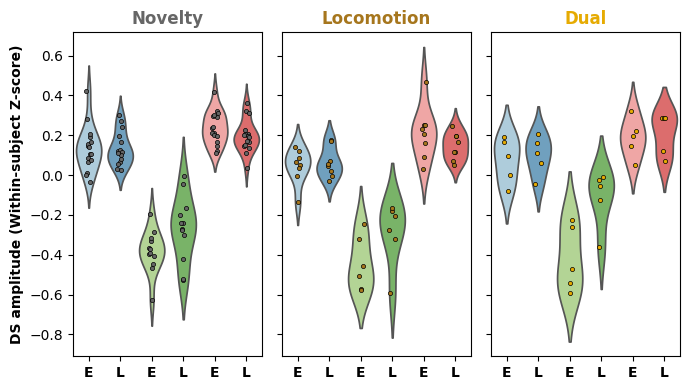

In [ ]:
fig, axes = do_plot(measures, "DSPK Amplitude", "DS amplitude (Within-subject Z-score)")
# fig.savefig(
#     nb.get_project_file("figures/exp_condition_measures_dspk_height.png"),
#     bbox_inches="tight",
#     dpi=600,
# )

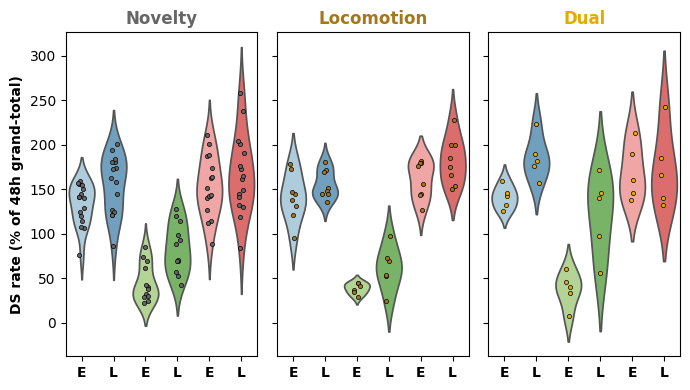

In [14]:
measures["DSPK Rate (%)"] = measures["DSPK Rate"] * 100
fig, axes = do_plot(measures, "DSPK Rate (%)", "DS rate (% of 48h grand-total)")
# fig.savefig(
#     nb.get_project_file("figures/exp_condition_measures_dspk_rate.png"),
#     bbox_inches="tight",
#     dpi=600,
# )